In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import mean,inf,arange
from numpy import std,var
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,GridSearchCV,train_test_split

In [2]:
scaler = StandardScaler()

In [3]:
df = pd.read_csv('../../../data/dataset.csv')

In [9]:
def get_new_target(col):
    return 1 if col == 'V' else 0

In [10]:
df['new_target'] = df['liverpool_result_ft'].apply(get_new_target)

In [11]:
x = df.drop(columns=['liverpool_result_ft'])

In [12]:
y = df['liverpool_result_ft']

In [13]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [14]:
y_new = df['new_target']

In [19]:
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=100, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y_new, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.685 (0.048)


In [12]:
# define grid
grid = dict()
grid['solver'] = ['lsqr']
grid['shrinkage'] = arange(0, 1, 0.01)
grid['n_components'] = arange(2,6,1)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [13]:
search.fit(x_scaled, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': array([2, 3, 4, 5]),
                         'shrinkage': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                         'solver': ['lsqr']},
             scoring='accuracy')

In [14]:
res = pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

In [15]:
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_components,param_shrinkage,param_solver,params,split0_test_score,split1_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
8,0.010828,0.004789,0.006670,0.004526,2,0.08,lsqr,"{'n_components': 2, 'shrinkage': 0.08, 'solver...",0.642857,0.623188,...,0.623188,0.579710,0.685714,0.652174,0.637681,0.550725,0.550725,0.608737,0.041107,1
10,0.012197,0.007733,0.005345,0.003546,2,0.1,lsqr,"{'n_components': 2, 'shrinkage': 0.1, 'solver'...",0.642857,0.623188,...,0.623188,0.565217,0.685714,0.652174,0.637681,0.550725,0.550725,0.607785,0.042152,2
9,0.010600,0.006171,0.004698,0.002222,2,0.09,lsqr,"{'n_components': 2, 'shrinkage': 0.09, 'solver...",0.642857,0.623188,...,0.623188,0.565217,0.685714,0.652174,0.637681,0.550725,0.550725,0.607785,0.042152,2
5,0.011497,0.003494,0.006186,0.003860,2,0.05,lsqr,"{'n_components': 2, 'shrinkage': 0.05, 'solver...",0.642857,0.623188,...,0.623188,0.579710,0.685714,0.652174,0.637681,0.550725,0.550725,0.607771,0.041605,4
6,0.010571,0.002958,0.003999,0.000891,2,0.06,lsqr,"{'n_components': 2, 'shrinkage': 0.06, 'solver...",0.642857,0.623188,...,0.623188,0.579710,0.685714,0.652174,0.637681,0.550725,0.550725,0.607771,0.041605,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.006980,0.002399,0.000000,0.000000,3,0.96,lsqr,"{'n_components': 3, 'shrinkage': 0.96, 'solver...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396
195,0.007152,0.002621,0.000000,0.000000,3,0.95,lsqr,"{'n_components': 3, 'shrinkage': 0.95000000000...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397
194,0.006780,0.001183,0.000000,0.000000,3,0.94,lsqr,"{'n_components': 3, 'shrinkage': 0.94000000000...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398
192,0.006271,0.001765,0.000000,0.000000,3,0.92,lsqr,"{'n_components': 3, 'shrinkage': 0.92, 'solver...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399


In [28]:
res_non_null = res[~res['mean_test_score'].isnull()]

Text(0, 0.5, 'Accuracy')

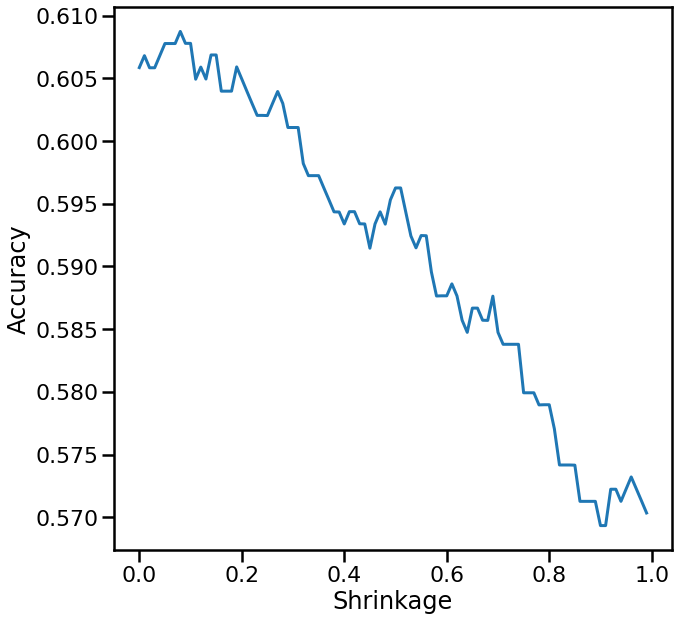

In [34]:
f, axs = plt.subplots(1,1,figsize=(10,10))
sns.set_context("poster")
sns.lineplot(x= 'param_shrinkage', y='mean_test_score',data=res_non_null,markers='o')
plt.xlabel('Shrinkage')
plt.ylabel('Accuracy')

c:\users\ibrah\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='param_shrinkage', ylabel='mean_test_score'>

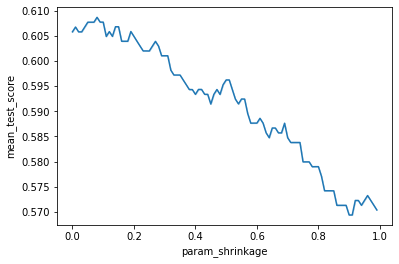

In [19]:
sns.lineplot(res['param_shrinkage'],res['mean_test_score'])

In [39]:
res_svd = res[res['param_solver'] == 'svd']

In [40]:
res_lsqr = res[res['param_solver'] == 'lsqr']

In [41]:
res_eigen = res[res['param_solver'] == 'eigen']

<AxesSubplot:xlabel='param_shrinkage', ylabel='mean_test_score'>

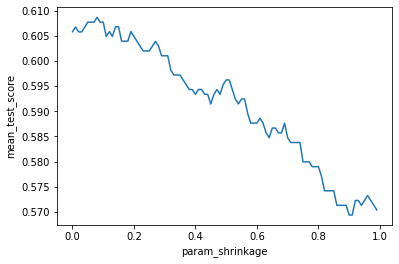

In [42]:
sns.lineplot(y='mean_test_score',x='param_shrinkage',data=res_eigen)

<AxesSubplot:xlabel='param_shrinkage', ylabel='mean_test_score'>

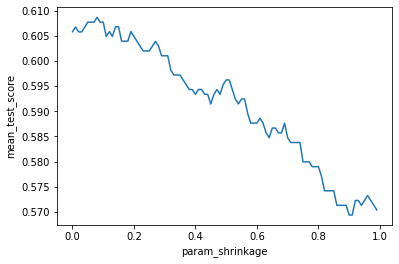

In [43]:
sns.lineplot(y='mean_test_score',x='param_shrinkage',data=res_lsqr)

<AxesSubplot:xlabel='param_shrinkage'>

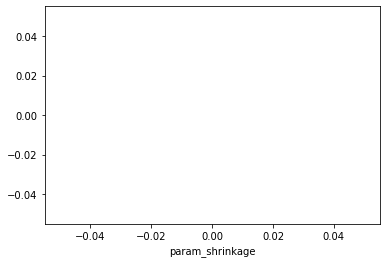

In [44]:
sns.lineplot(y='mean_test_score',x='param_shrinkage',data=res_svd)

In [49]:
pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_components,param_shrinkage,param_solver,params,split0_test_score,split1_test_score,...,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,mean_test_score,std_test_score,rank_test_score
25,0.009133,0.000881,0.004201,0.000542,2,0.08,lsqr,"{'n_components': 2, 'shrinkage': 0.08, 'solver...",0.642857,0.623188,...,0.623188,0.579710,0.685714,0.652174,0.637681,0.550725,0.550725,0.608737,0.041107,1
26,0.009402,0.001957,0.003530,0.000500,2,0.08,eigen,"{'n_components': 2, 'shrinkage': 0.08, 'solver...",0.642857,0.623188,...,0.623188,0.579710,0.685714,0.652174,0.637681,0.550725,0.550725,0.608737,0.041107,1
32,0.008999,0.001156,0.003934,0.000772,2,0.1,eigen,"{'n_components': 2, 'shrinkage': 0.1, 'solver'...",0.642857,0.623188,...,0.623188,0.565217,0.685714,0.652174,0.637681,0.550725,0.550725,0.607785,0.042152,3
31,0.008938,0.000997,0.004596,0.001016,2,0.1,lsqr,"{'n_components': 2, 'shrinkage': 0.1, 'solver'...",0.642857,0.623188,...,0.623188,0.565217,0.685714,0.652174,0.637681,0.550725,0.550725,0.607785,0.042152,3
29,0.009265,0.000856,0.004135,0.001082,2,0.09,eigen,"{'n_components': 2, 'shrinkage': 0.09, 'solver...",0.642857,0.623188,...,0.623188,0.565217,0.685714,0.652174,0.637681,0.550725,0.550725,0.607785,0.042152,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,0.005734,0.000931,0.000000,0.000000,3,0.79,eigen,"{'n_components': 3, 'shrinkage': 0.79, 'solver...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1196
540,0.005931,0.000770,0.000000,0.000000,3,0.8,svd,"{'n_components': 3, 'shrinkage': 0.8, 'solver'...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1197
541,0.005469,0.000719,0.000000,0.000000,3,0.8,lsqr,"{'n_components': 3, 'shrinkage': 0.8, 'solver'...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1198
528,0.005604,0.000708,0.000000,0.000000,3,0.76,svd,"{'n_components': 3, 'shrinkage': 0.76, 'solver...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1199


In [8]:
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [41]:
part = []
mean_acc = []
for i in np.linspace(0.05,0.5,num=100):
    i=round(i,3)
    part.append(i)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = i)
    model = LinearDiscriminantAnalysis()
    acc = evaluate_model(x_train,y_train,model)
    mean_acc.append(np.mean(acc))

<AxesSubplot:>

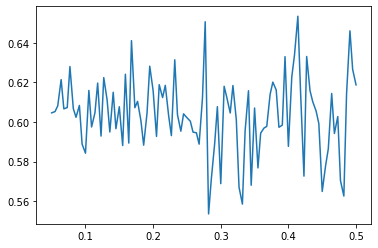

In [44]:
sns.lineplot(x=part,y=mean_acc)

In [40]:
[f'{str(i)} : {str(j)}' for i,j in zip(part[-5:],mean_acc[-5:])]

['0.4818181818181818 : 0.6387301587301586',
 '0.48636363636363633 : 0.6480423280423279',
 '0.49090909090909085 : 0.5814814814814814',
 '0.4954545454545454 : 0.6667226890756301',
 '0.5 : 0.5953501400560224']

In [15]:
np.linspace(0.2,0.5,num=7)

array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])